# Project: NO-SHOW APPOINTMENTS ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

##### 1.  ‘ScheduledDay’ tells us on what day the patient set up their appointment.
##### 2.  ‘Neighborhood’ indicates the location of the hospital.
##### 3.  ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
##### 4.  The last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Column Attributes
* PatientId
* AppointmentID
* Gender
* ScheduledDay
* AppointmentDay
* Age
* Neighbourhood
* Scholarship
* Hipertension
* Diabetes
* Alcoholism
* Handcap
* SMS_received
* No-show

 ## Question(s) for Analysis
 #### 1.Which Gender showed more on  their Appointment Day?
 #### 2.How many patients are enrolled in Brasilian welfare program?
 #### 3.What date did patient showed more on their appointment_Day?

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your datasets 
df_show = pd.read_csv(r'C:\Users\User\Desktop\Data analytics s\UDACITY\UDACITY PROJECTS\project1\noshowappointments-kagglev2-may-2016.csv')
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning: Cleaning my dataset to make sure it is free from impurities.

In [3]:
# The structure of the datasets
df_show.shape

(110527, 14)

    This datasets contains 110527 ROWS AND  14 COLUMNS, AS SHOWS FROM THE SHAPE ANALYSIS.

In [4]:
# checking to know column with missing data
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


    FROM THE INFO ANALYSIS ABOVE WE HAVE 110527 ENTRIES WHICH RESULTED TO NO COLUMN HAVING MISSING VALUES.

In [5]:
df_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


   From the above descriptive analysis:

   ###### 1.110527 patients were given appointment day.  
   ###### 2. Average age that went for the appointment was 37 years.
   ###### 3. 115 years was the Maximum age that was present for the appointment.
   ###### 4. Atleast 25% of the Patients that want for the Appointment were 18 years and above.
   ###### 5. Average SMS_received was 30%
 
  

In [6]:
# checking for duplicated values
df_show.duplicated().value_counts()

False    110527
dtype: int64

    FROM THE ABOVE ANALYSIS WE HAVE NO DUPLICATED DATA

In [7]:
# Total sum of duplicates
sum(df_show.duplicated())

0

    ZERO DUPLICATE

In [8]:
# checking for unique values present in every columns
df_show.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

    FROM THE ABOVE UNIQUE DATA: IT RESULTED TO "SCHOLARSHIP ,HIPERTENSION,DIABETES,ALCOHOLISM,HANDCAP,GENDER,SMS_RECEIVED AND NO-SHOW" HAS JUST 2 UNIQUE VALUES,WITH APPOINTMENTDAY HANING 27 UBNIQUE VALUES AND AGE 104 VALUES.

In [9]:
# checking every column if there is any missing entries
df_show.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

FROM THE ABOVE ANALYSIS IT RESULTED TO NO MISSING VALUES IN THE COLUMN PRESENT IN THE DATASET

### CLEANING STEPS

From the Analysis above we noticed that they are No missing values(NAN) and No duplicated values.  
###### 1.Drop unneccessary columns that won't be needed in the Analysis.
###### 2.Conversion of Appointment  Day from DateTime to just Date
###### 3.Conversion of Scheduled Day from DateTime to just Date

#### 1. Dropping unneccessary columns

In [10]:
# Dropping every unneccessary column present in the datasets
# PatientId and Appointment needs to be dropped ,because we cant carry analysis on
#it despite the fact that it is NUMERICAL. 
df_show.drop(['PatientId','AppointmentID','SMS_received','Neighbourhood'], axis = 1,inplace = True)

df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No


### 2. Conversion of Appointment Day from DateTime to just Date

In [11]:
# AppointmentDay has been converted to AppointmentDate
df_show['AppointmentDate'] = pd.to_datetime(df_show["AppointmentDay"]).dt.date

# print first 5 rows to inspect
df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,AppointmentDate
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No,2016-04-29
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,2016-04-29
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,2016-04-29
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,2016-04-29
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No,2016-04-29


#### 3.Conversion of Scheduled Day from DateTime to just Date

In [12]:
# ScheduledDay has been converted to ScheduledDate
df_show['ScheduledDate'] = pd.to_datetime(df_show["ScheduledDay"]).dt.date

# print first 5 rows to inspect
df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,AppointmentDate,ScheduledDate
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No,2016-04-29,2016-04-29
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,2016-04-29,2016-04-29
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,2016-04-29,2016-04-29
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,2016-04-29,2016-04-29
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No,2016-04-29,2016-04-29


In [13]:
# I have automatically added two extra columns called AppointmentDate and ScheduledDate.
# Therefore i wont be needing the initial columns called AppointmentDay and ScheduledDay
# so it is adversible to drop them.

##### Dropping the 2 initial columns called AppointmentDay and ScheduledDay

In [16]:
# dropping the 2 initial columns
df_show.drop(['AppointmentDay','ScheduledDay'], axis = 1,inplace = True)

In [17]:
# lets check the structure of the datasets again
df_show.shape

(110527, 10)

Successfully dropped 4 columns from the datasets

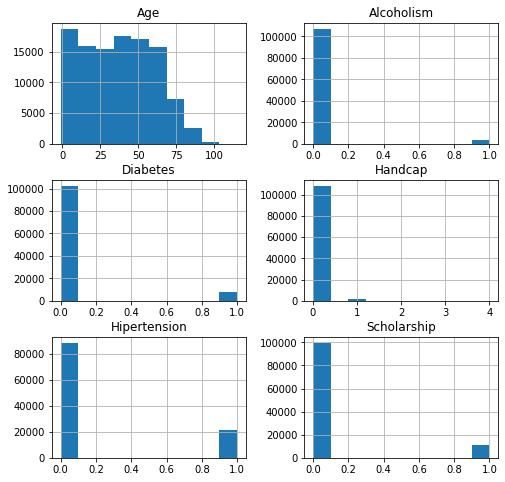

In [18]:
# explore data
df_show.hist(figsize=(8, 8));

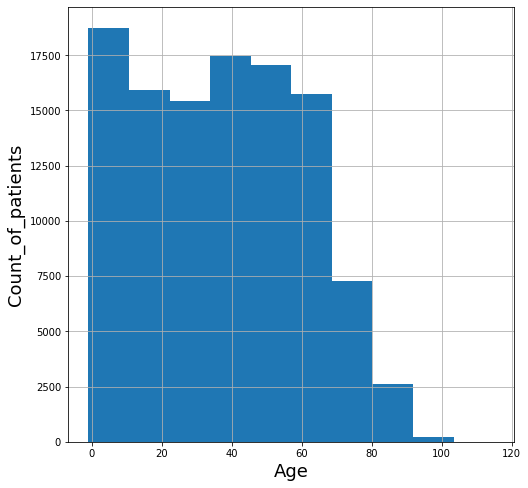

In [19]:
# checking the distribution for Age
df_show['Age'].hist(figsize = (8,8))
plt.xlabel('Age',fontsize =18)
plt.ylabel('Count_of_patients',fontsize=18);

The above plot shows a distribution of Age patient that had Appointment and it is LEFT SKEWED

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1. Which Gender showed more on  their Appointment Day

In [20]:
# from the last column in the datasets : NO = patient showed up at their appointment
                                    #    YES = patient did not showed up at their appointment
# I need only those that showed up i.e NO
#lets query only NO
df_no = df_show[df_show['No-show'] == 'No']
    
df_no

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,AppointmentDate,ScheduledDate
0,F,62,0,1,0,0,0,No,2016-04-29,2016-04-29
1,M,56,0,0,0,0,0,No,2016-04-29,2016-04-29
2,F,62,0,0,0,0,0,No,2016-04-29,2016-04-29
3,F,8,0,0,0,0,0,No,2016-04-29,2016-04-29
4,F,56,0,1,1,0,0,No,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,0,0,0,0,0,No,2016-06-07,2016-05-03
110523,F,51,0,0,0,0,0,No,2016-06-07,2016-05-03
110524,F,21,0,0,0,0,0,No,2016-06-07,2016-04-27
110525,F,38,0,0,0,0,0,No,2016-06-07,2016-04-27


In [21]:
# To know whose Gender showed more,we use groupby
df_gender = df_no.groupby('Gender')['No-show'].count()

df_gender

Gender
F    57246
M    30962
Name: No-show, dtype: int64

In [22]:
# DEFINING A FUNCTION TO SUM THE TOTAL NUMBER OF GENDER WITH NO-SHOW
def sum(m,f):
    return m + f

m = int(input('Total male with No-show :'))
f = int(input('Total female with No-show :'))
c = sum(m,f)
print('Total Patient with NO-Show at their Appointment day:',c)

Total male with No-show :30962
Total female with No-show :57246
Total Patient with NO-Show at their Appointment day: 88208


    From the define function above, I calculated the total sum of patient that had NO-show on their Appointment day Equivalent to 88208

##### visuals for Question 1


In [36]:
df_gender=df_no.groupby('Gender').count()['No-show']
df_gender

Gender
F    57246
M    30962
Name: No-show, dtype: int64

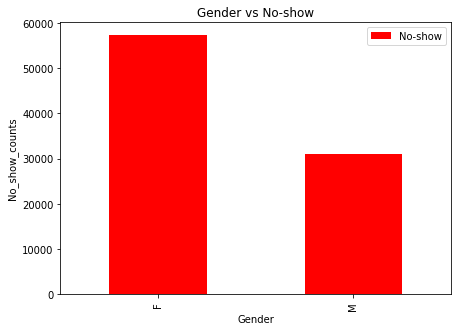

In [37]:
df_gender.plot(kind='bar',  color='r', figsize=(7,5))
plt.title('Gender vs No-show')
plt.ylabel('No_show_counts')
plt.xlabel('Gender')
plt.legend(); 

FROM THE ABOVE BAR-CHART:
    This sample shows us that FEMALE were more Present at their appointment day than MALE with a Total COUNT of 57246.

### Research Question 2  How many  patients are  enrolled in Brasilian welfare program?


In [38]:
#Scholarship  indicates whether or not the patient is enrolled in Brasilian welfare program
 # Scholarship indicators:
       # patient enrolled = 1
       # patient did't enrolled = 0
  # now lets query patient that enrolled
df_enrolled= df_show.query('Scholarship == 1')

#lets view the datasets
df_enrolled

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,AppointmentDate,ScheduledDate
12,F,22,1,0,0,0,0,No,2016-04-29,2016-04-28
17,F,40,1,0,0,0,0,Yes,2016-04-29,2016-04-28
18,F,30,1,0,0,0,0,No,2016-04-29,2016-04-26
31,M,12,1,0,0,0,0,Yes,2016-04-29,2016-04-27
33,F,38,1,0,0,0,0,No,2016-04-29,2016-04-25
...,...,...,...,...,...,...,...,...,...,...
110423,F,34,1,0,0,0,0,No,2016-06-08,2016-05-16
110426,M,13,1,0,0,0,0,No,2016-06-08,2016-05-25
110473,M,2,1,0,0,0,0,No,2016-06-07,2016-06-07
110479,F,34,1,0,0,0,0,Yes,2016-06-06,2016-04-29


In [39]:
df_enrolledGender = df_enrolled.groupby('Gender')['Scholarship'].count()

df_enrolledGender

Gender
F    8853
M    2008
Name: Scholarship, dtype: int64

Total sum of candidate that Enrolled = 8843 + 2008 =10851 PATIENTS

##### visuals for Question 2

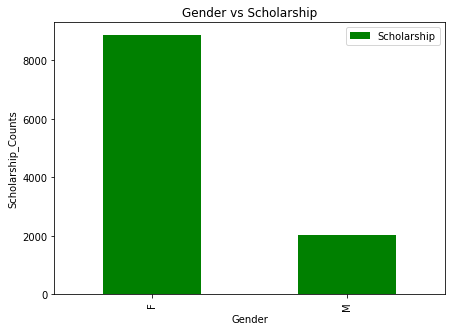

In [41]:
df_enrolledGender.plot(kind='bar',  color='g', figsize=(7,5))
plt.title('Gender vs Scholarship')
plt.ylabel('Scholarship_Counts')
plt.xlabel('Gender')
plt.legend(); 

FROM THE ABOVE BAR-CHART:
    This sample shows us that FEMALE Enrolled more than MALE with a Total COUNT of 8853.

#### Research Question 3: What date did patient showed more on their appointment_Day?.

In [93]:
# Firstly I need to work with the initial datasets i queried,df_no
df_Date = df_no.groupby(['Gender','AppointmentDate'])['AppointmentDate'].count().sort_values(ascending=False)

# view datasets
df_Date

Gender  AppointmentDate
F       2016-06-06         2507
        2016-06-08         2463
        2016-06-07         2412
        2016-06-01         2382
        2016-05-30         2338
        2016-05-11         2325
        2016-05-12         2295
        2016-05-31         2292
        2016-05-17         2280
        2016-05-18         2270
        2016-05-05         2259
        2016-05-16         2248
        2016-05-02         2246
        2016-06-02         2241
        2016-05-09         2237
        2016-05-03         2209
        2016-05-19         2170
        2016-05-10         2166
        2016-06-03         2146
        2016-05-24         2093
        2016-05-04         2081
        2016-05-25         2044
        2016-05-13         1976
        2016-05-06         1973
        2016-05-20         1907
        2016-04-29         1664
M       2016-05-16         1316
        2016-06-06         1312
        2016-05-30         1288
        2016-06-01         1270
        2016-05-

From the analysis above '2016-06-06' happen to be the Date with more Patient at the appointment Day with a Total count of 2507.

#### visuals for Question 3:

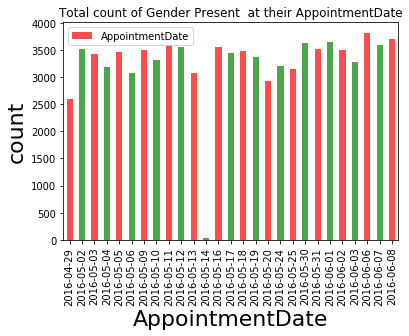

In [207]:
colors = ['red','green']
df_no.groupby('AppointmentDate')['AppointmentDate'].count().plot(kind='bar',title='Total count of Gender Present  at their AppointmentDate',color=colors,alpha=.7)
plt.xlabel('AppointmentDate',fontsize =22)
plt.ylabel('count',fontsize=22)
plt.legend()
plt.show();

   From the analysis above majority of Patient had their Appointment day on '2016-06-06' with a Total count of 2507.

<a id='conclusions'></a>
## Conclusions

##### MY FINDINGS AND RESULTS:
    1.From the above analysis the Total number of Patient that attended(Show) on  their appointment day amounted to 88208 patients,with 57246 Female and 30962 Male. 
    2.Total Number of patient that enrolled at Brasilian welfare program were 10861 patients,with 8853 Female and 2008 Male.
    3.The most showed Date for Appointment Day was '2016-06-06' and Majority of them where Female.


##### SOURCES USED IN THIS ANALYSIS:
1.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
2.https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
3.https://sparkbyexamples.com/pandas/pandas-convert-datetime-to-date/